In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.misc import derivative
import math
import time
from moviepy.editor import *

In [10]:
def get_stable_footage(video_path):
    print('Searching for most stable part')

    cap = cv2.VideoCapture(video_path)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # step 2
    # Read first frame
    _, prev = cap.read()

    # Convert frame to grayscale
    prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

    # translation
    # Pre-define transformation-store array
    transforms = np.zeros((n_frames - 4, 3), np.float32)

    for i in range(n_frames - 4):
        # Detect feature points in previous frame
        prev_pts = cv2.goodFeaturesToTrack(prev_gray,
                                           maxCorners=200,
                                           qualityLevel=0.01,
                                           minDistance=30,
                                           blockSize=3)

        # Read next frame
        success, curr = cap.read()
        if not success:
            break

        # Convert to grayscale
        curr_gray = cv2.cvtColor(curr, cv2.COLOR_BGR2GRAY)

        # Calculate optical flow (i.e. track feature points)
        curr_pts, status, err = cv2.calcOpticalFlowPyrLK(
            prev_gray, curr_gray, prev_pts, None)

        # Sanity check
        assert prev_pts.shape == curr_pts.shape

        # Filter only valid points
        idx = np.where(status == 1)[0]
        prev_pts = prev_pts[idx]
        curr_pts = curr_pts[idx]

        # Find transformation matrix
    #   m = cv2.estimateRigidTransform(prev_pts, curr_pts, fullAffine=False)
        # will only work with OpenCV-3 or less
        m, inliers = cv2.estimateAffinePartial2D(prev_pts, curr_pts)

        # Extract traslation
        try:
            dx = m[0, 2]
            dy = m[1, 2]
        except TypeError:
            break

        # Extract rotation angle
        da = np.arctan2(m[1, 0], m[0, 0])

        # Store transformation
        transforms[i] = [dx, dy, da]

        # Move to next frame
        prev_gray = curr_gray
        trajectory_x = np.cumsum(transforms, axis=0)
        trajectory_y = np.cumsum(transforms, axis=1)

    container_x, dif_x = calc_dif(trajectory_x)
    container_y, dif_y = calc_dif(trajectory_y)
    container_x = [x for x in container_x if x]
    container_x.sort(key=len, reverse=True)

    container_y = [y for y in container_y if y]
    container_y.sort(key=len, reverse=True)

    try:
        container = np.intersect1d(container_x, container_y)
        return trajectory_x, trajectory_y, dif_x, dif_y, container_x, container_y
    except (IndexError, TypeError):
        return trajectory_x, trajectory_y


def calc_dif(trajectory):
    graph = []
    for el in trajectory:
        graph.append(el[1])
    dif_x = []
    for i, el in enumerate(graph):
        if i > 0:
            dif_x.append(round(el - graph[i - 1]))
    for i, el in enumerate(dif_x):
        if el <= 0 and el >= 0:
            dif_x[i] = 0
        else:
            dif_x[i] = 1
    container = []
    j = 0
    for i, el in enumerate(dif_x):
        if i > 0:
            if dif_x[i - 1] == 0 and el == 0:
                container[j].append(i)
            else:
                j = j + 1
                container.append([])
        else:
            container.append([])

    return container, dif_x


In [13]:
path = 'C:\\Users\\Szymon\\Desktop\\Erasmus\\P1170002.mp4'

In [14]:
trajectory_x , trajectory_y, dif_x, dif_y, container_x, container_y = get_stable_footage(path)

Searching for most stable part


In [42]:
t = np.arange(len(trajectory_x[0]))

(-5.0, 105.0)

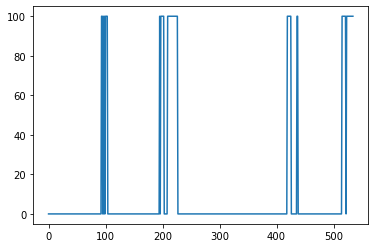

In [15]:
scale_factor = 1
plt.plot(dif_x)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin, ymax)

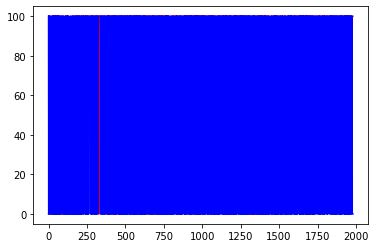

In [44]:
plt.plot(dif_x,'r', label='X axis')
plt.plot(dif_y,'b',label = 'Y axis' )
plt.savefig('graph.pdf')


In [45]:
dif_x

[0, 0, 0, 0, 0, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 100, 100, 0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 0, 100, 100, 100, 100, 100, 0, 100, 100, 100, 100, 100, 100, 100, 100, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 100, 0, 0, 0, 100, 100, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 100, 0, 100, 100, 100, 0, 0, 100, 0, 0, 100, 0, 0, 100, 100, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 100, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 100, 0, 100, 0, 0, 0, 100, 0, 0, 100, 0, 0, 0, 0, 100, 100, 0, 100, 100, 100, 100, 100, 100, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100

In [46]:
print(len(container_x[0]))
print(container_x[0])

20
[134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]


In [47]:
print(len(container_x[0]))

20


In [48]:
print(len(container_x[2]))

15


In [53]:
clip = VideoFileClip(path)
clip = [frame for frame in clip.iter_frames()]


In [68]:
def detect_blur(chunk, number_of_frames):
        lap_values = []
        compared_values = []

        for i, frame in enumerate(chunk):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            fm = cv2.Laplacian(gray, cv2.CV_64F).var()
            lap_values.append((fm, i))

        lap_values.sort(key=lambda x: x[0], reverse=True)
        print(lap_values)

        for i, val in enumerate(lap_values):
            if val[1] + number_of_frames - 1 <= len(chunk):
                ind1 = val[1]
                ind2 = val[1] + number_of_frames - 1
                return chunk[ind1:ind2]

        return chunk

In [69]:
detect_blur(chunk = clip, number_of_frames = 25)

97886978, 1452], [175.9392012965826, 1605], [175.8796654552884, 1542], [175.84546925860752, 1735], [175.79101111470922, 1622], [175.75133936358787, 1055], [175.6681168969425, 1114], [175.66186321115376, 1435], [175.58537324911993, 1768], [175.53385849863687, 1026], [174.99384859182103, 1771], [174.99019083930122, 1488], [174.92101561226553, 1484], [174.8139060654628, 1403], [174.79623458591038, 1428], [174.78974365234373, 1172], [174.7138084053699, 1455], [174.67248027313605, 1125], [174.57369631046245, 1410], [174.53769931452243, 1415], [174.4578074434069, 1617], [174.45362651638453, 1051], [174.44919913509042, 1074], [174.37959646259836, 1176], [174.27880017835827, 1606], [174.26245545722117, 1796], [174.17177517361114, 1281], [174.15279763362554, 1738], [173.9897212908521, 1780], [173.9574808979553, 1752], [173.91631074459877, 1280], [173.74617098914246, 1086], [173.62879198222214, 1472], [173.48895383012558, 1784], [173.38346718024735, 1383], [173.27890533824032, 1763], [173.222374

       ...,
         [100,  95,  92],
         [101,  96,  93],
         [103,  98,  95]],
 
        [[136, 107,  87],
         [136, 107,  87],
         [140, 111,  91],
         ...,
         [104,  99,  96],
         [104,  99,  96],
         [104,  99,  96]],
 
        ...,
 
        [[ 94,  87,  85],
         [ 94,  87,  85],
         [ 94,  87,  85],
         ...,
         [ 90,  90,  90],
         [ 90,  90,  90],
         [ 89,  89,  89]],
 
        [[107, 100,  98],
         [107, 100,  98],
         [107, 100,  98],
         ...,
         [ 93,  93,  93],
         [ 93,  93,  93],
         [ 91,  91,  91]],
 
        [[119, 112, 110],
         [119, 112, 110],
         [119, 112, 110],
         ...,
         [ 94,  94,  94],
         [ 94,  94,  94],
         [ 93,  93,  93]]], dtype=uint8),
 array([[[106,  79,  63],
         [106,  79,  63],
         [120,  93,  77],
         ...,
         [ 99,  94,  91],
         [100,  95,  92],
         [103,  98,  95]],
 
        [[138,